<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**


---

# Clustering com PyCaret - Public Health

Mais uma vez, trazemos o PyCaret para demonstrar como utilizar AutoML para solução de problemas de Machine Learning com agilidade e precisão.

<p align="center"><img src="https://images.unsplash.com/photo-1580795479025-93d13fd9aa6c?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1025&q=80" width="60%"></p>

Dessa vez, falaremos sobre Clustering.

<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="60%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser *low-code*, isto é, demanda pouco código para que opere de forma robusta. Todas as operações realizadas com o PyCaret estão carregadas em um pipeline que está pronto para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais.


## Instalando o PyCaret

Por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. Por isso, é importante que sempre que formos trabalhar com ele por aqui, façamos a instalação da lib.

In [ ]:
# instalando a biblioteca
!pip install pycaret -q

Além disso, precisamos ativar o modo do Colab. Assim, conseguiremos utilizar as biblioteca aqui no Colab.

In [ ]:
# configurando para o Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## Coletando os Dados

O PyCaret possui data sets e uma forma própria de carregar esses dados. Para esse projeto, vamos utilizar dados referentes a saúde pública de uma determinada região.

In [ ]:
# importando os dados
from pycaret.datasets import get_data
dataset = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,2.314914,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,2.845971,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,4.913629,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,2.346824,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,4.626696,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [ ]:
# verificando o formato dos conjunto
dataset.shape

(224, 21)

In [ ]:
# separando treino e teste
train = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
test = dataset.drop(train.index).reset_index(drop=True)

### Configurando o ambiente no PyCaret
Seguindo as boas práticas para desenvolvimento, vamos importar somente os módulos que vamos precisar, ao invés de importar a biblioteca inteira para utilizar meia dúzia de módulos.

In [ ]:
# importando os pacotes necessários
from pycaret.clustering import *

Agora, vamos passar os nossos dados para o PyCaret, para começarmos a explorar os dados e preparar nosso modelo.

Aqui, vamos criar um classificador (clf), e vamos passar os dados, e a variável alvo.

In [ ]:
# criando o setup do PyCaret
clus = setup(data=train,
             normalize = True)

,Description,Value
0,session_id,4196
1,Original Data,"(213, 21)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(213, 233)"
9,CPU Jobs,-1


### Comparando os Modelos
Aqui, vamos comparar diferentes modelos, para verificar a performance deles em nosso conjunto de dados, baseado na métrica de avaliação de nossa escolha.


In [ ]:
# criando modelo
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3804,244.3124,0.8559,0,0,0


In [ ]:
# verificando os parâmetros
print(kmeans)

NameError: ignored

In [ ]:
# definindo os clusters
model_result = assign_model(kmeans)
model_result.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Canada,6.313500,6.112419,6.033112,6.228971,6.107698,6.098427,6.364905,6.514306,6.694244,6.719902,6.723560,6.788408,6.893501,7.063454,7.914158,7.884396,7.676793,7.651145,7.575665,7.411932,Cluster 2
1,Maldives,3.662614,3.603094,3.544089,4.648467,4.749579,5.119448,3.700268,3.567183,3.778201,3.876878,7.126650,5.237830,4.553267,7.025878,6.729712,5.273435,5.608782,6.502927,8.263833,10.757052,Cluster 0
2,Mauritania,2.230334,1.328808,1.492191,2.084762,2.901813,2.770994,1.879560,2.862060,2.179218,2.464113,2.033356,1.447616,1.651791,1.354565,1.799803,1.521054,1.279141,1.370247,1.726039,1.871016,Cluster 1
3,Sub-Saharan Africa,2.449863,2.516645,2.494454,2.437191,2.374140,2.271764,2.365897,2.179882,2.392891,2.486942,2.485236,2.510834,2.462421,2.512477,2.711077,2.489037,2.624570,2.543530,2.459809,2.314823,Cluster 1
4,Sub-Saharan Africa (excluding high income),2.447084,2.513732,2.490668,2.433949,2.370627,2.269188,2.363320,2.177062,2.390205,2.484999,2.483687,2.509610,2.461744,2.512576,2.711330,2.488515,2.624164,2.542636,2.459071,2.314178,Cluster 1


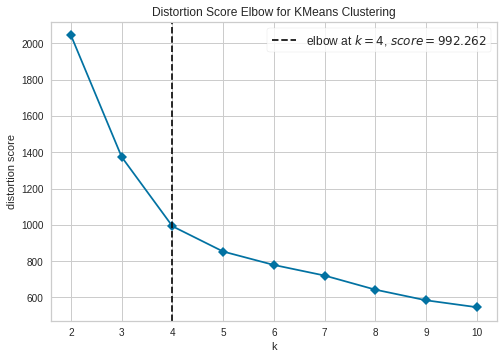

In [ ]:
# plotando o modelo
plot_model(kmeans, 'elbow')

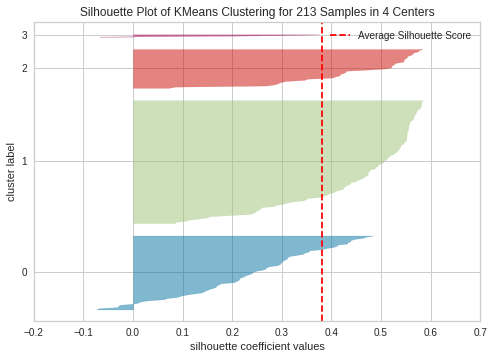

In [ ]:
# plotando o modelo
plot_model(kmeans, 'silhouette')

In [ ]:
# plotando o modelo
plot_model(kmeans, 'distribution')

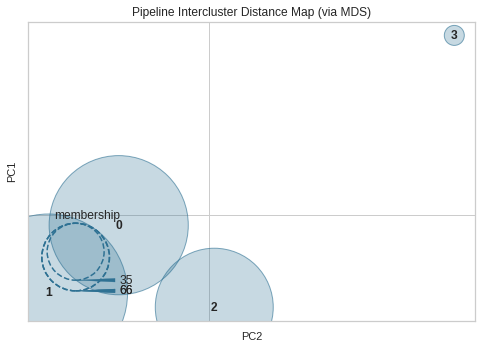

In [ ]:
# plotando o modelo
plot_model(kmeans, 'distance')

In [ ]:
# plotando o modelo
plot_model(kmeans)

In [ ]:
# prevendo em dados de teste
new_pred = predict_model(kmeans, data=test)
new_pred.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Ukraine,5.088199,4.789083,4.193678,3.540202,2.942150,2.895455,3.072139,3.514016,4.042590,3.869747,3.811739,3.884569,3.930454,3.825091,4.292354,4.421335,3.729821,4.125240,4.150795,3.604521,Cluster 0
1,United Arab Emirates,2.081738,1.948806,1.948396,2.056707,1.917629,1.677059,1.944492,1.713983,1.671540,1.456043,1.368897,1.382507,1.555377,1.921634,3.034126,2.834166,2.732488,2.550026,2.557326,2.636152,Cluster 1
2,United Kingdom,5.613873,5.574902,5.216401,5.273439,5.503507,5.523467,5.765950,6.040016,6.209568,6.482430,6.658345,6.826598,6.794481,7.220153,8.162898,7.941676,7.765411,7.802633,7.780481,7.578850,Cluster 2
3,United States,5.909479,5.891274,5.830750,5.676669,5.613685,5.653471,6.074098,6.423941,6.618868,6.698100,6.722609,6.882533,7.016360,7.367884,8.014550,8.079784,8.074127,8.042358,8.045007,8.278518,Cluster 2
4,Uruguay,3.880155,3.424729,2.612250,2.586153,2.918064,2.711548,2.314327,2.044716,1.753428,7.293884,7.069811,7.245025,4.593275,5.297813,5.352677,5.372432,5.520951,5.947089,6.074635,6.111484,Cluster 0


In [ ]:
# salvando o modelo
save_model(kmeans, 'kmeans_01_09_21')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe